  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0    adviser     32/60   125   256   6000   256     16    128  198
1     amdahl    470v/7    29  8000  32000    32      8     32  269
2     amdahl   470v/7a    29  8000  32000    32      8     32  220
3     amdahl   470v/7b    29  8000  32000    32      8     32  172
4     amdahl   470v/7c    29  8000  16000    32      8     16  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 14.8+ KB
Non

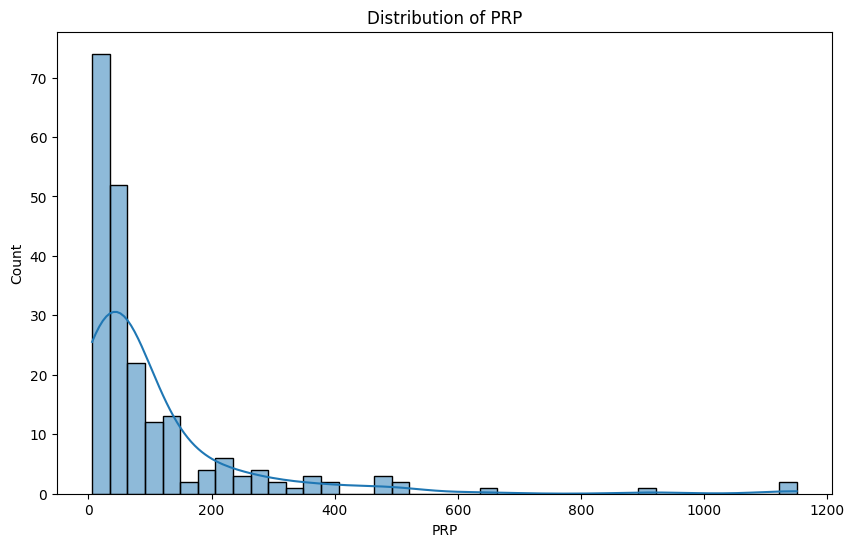

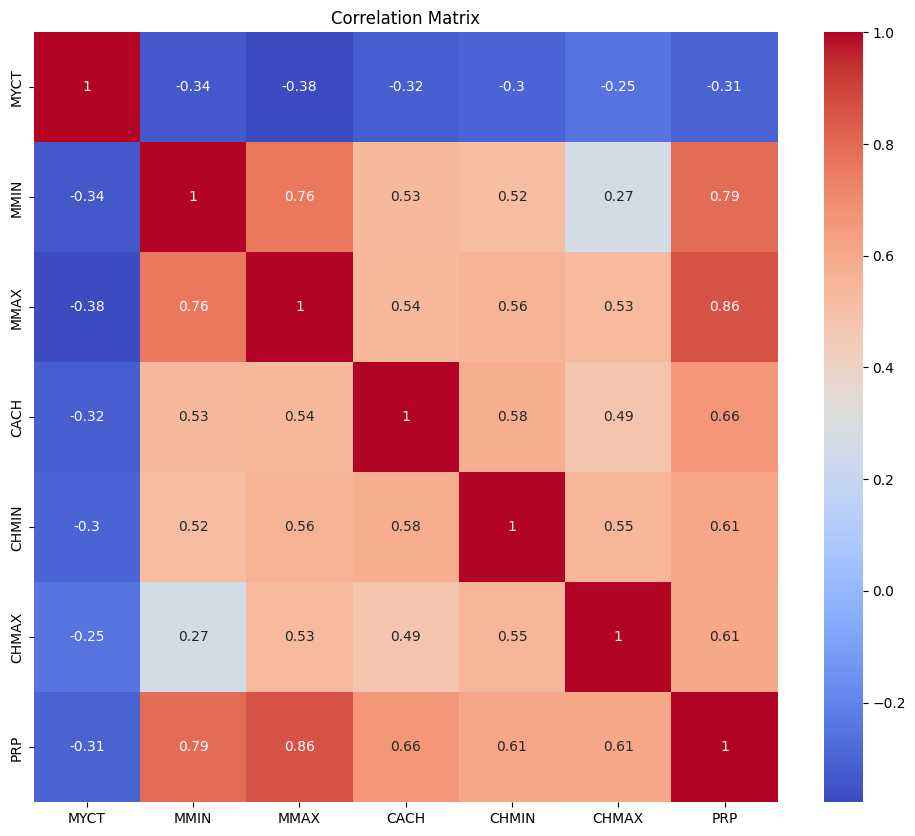

Cross-Validation R^2 Scores: [ 0.63229752  0.41201351 -0.4480466   0.8422106   0.76487551 -0.04917505
  0.88779833  0.90986424  0.85308127  0.85357074]
Mean Cross-Validation R^2 Score: 0.5658490064954824
Training Data - MSE: 3117.658905430178, MAE: 35.12200634651686, R^2: 0.8378284557995717
Testing Data - MSE: 5633.068155793253, MAE: 48.068801347004765, R^2: 0.8893455830696775


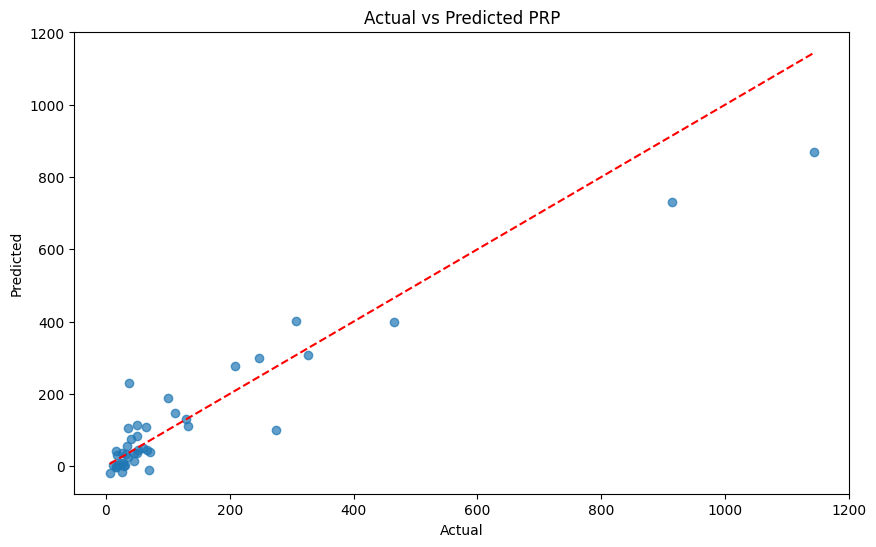

Best Parameters: {'poly__degree': 2, 'regressor__alpha': 10.0}
Best Model Training Data - MSE: 905.6495309753949, MAE: 19.713157448636448, R^2: 0.9528907467436987
Best Model Testing Data - MSE: 6659.426776336157, MAE: 39.54412735095117, R^2: 0.8691840811001363


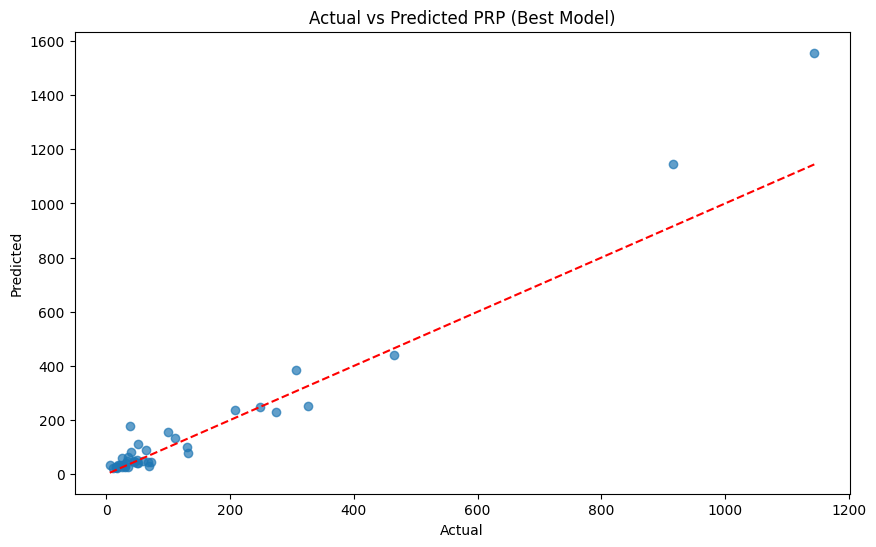

  Metric  Train_Linear  Test_Linear  Train_Best    Test_Best
0    MSE   3117.658905  5633.068156  905.649531  6659.426776
1    MAE     35.122006    48.068801   19.713157    39.544127
2    R^2      0.837828     0.889346    0.952891     0.869184


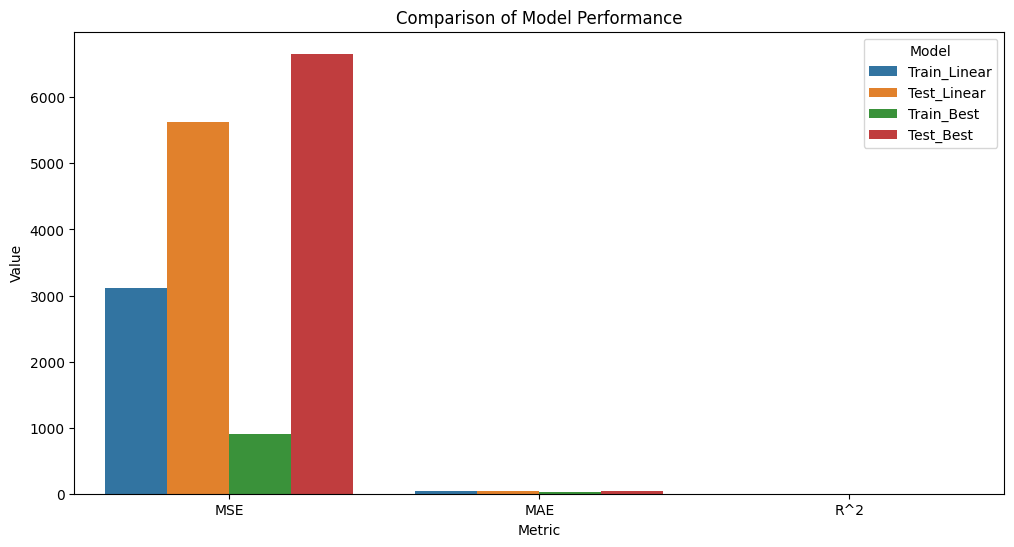

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset, skipping the first row
data = pd.read_csv('machine.data.csv', header=None, skiprows=1)
data.columns = ['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']

# Display the first few rows of the dataset
print(data.head())

# Displaying the basic information and statistics of the dataset
print(data.info())
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Visualizing the distribution of the target variable 'PRP'
plt.figure(figsize=(10, 6))
sns.histplot(data['PRP'], kde=True)
plt.title('Distribution of PRP')
plt.show()

# Dropping non-numeric columns 'VendorName' and 'ModelName'
data = data.drop(['VendorName', 'ModelName'], axis=1)

# Ensure all columns are numeric
data = data.apply(pd.to_numeric)

# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Splitting the dataset into features and target variable
X = data.drop('PRP', axis=1)
y = data['PRP']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline for linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Training the linear regression model
pipeline.fit(X_train, y_train)

# Performing cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2')
print('Cross-Validation R^2 Scores:', cv_scores)
print('Mean Cross-Validation R^2 Score:', np.mean(cv_scores))

# Predicting on training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluating the model on training data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Training Data - MSE: {mse_train}, MAE: {mae_train}, R^2: {r2_train}')

# Evaluating the model on testing data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Testing Data - MSE: {mse_test}, MAE: {mae_test}, R^2: {r2_test}')

# Visualizing the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted PRP')
plt.show()

# Creating a pipeline for polynomial regression and hyperparameter tuning
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', Ridge())
])

# Defining the parameter grid
param_grid = {
    'poly__degree': [1, 2, 3],
    'regressor__alpha': [0.1, 1.0, 10.0]
}

# Performing GridSearchCV
grid_search = GridSearchCV(pipeline_poly, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

# Getting the best model from GridSearchCV
best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)

# Evaluating the best model on training data
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
r2_train_best = r2_score(y_train, y_train_pred_best)
print(f'Best Model Training Data - MSE: {mse_train_best}, MAE: {mae_train_best}, R^2: {r2_train_best}')

mse_test_best = mean_squared_error(y_test, y_test_pred_best)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)
print(f'Best Model Testing Data - MSE: {mse_test_best}, MAE: {mae_test_best}, R^2: {r2_test_best}')

# Visualizing the predicted vs actual values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted PRP (Best Model)')
plt.show()

# Comparing the performance of the original and improved models
results = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R^2'],
    'Train_Linear': [mse_train, mae_train, r2_train],
    'Test_Linear': [mse_test, mae_test, r2_test],
    'Train_Best': [mse_train_best, mae_train_best, r2_train_best],
    'Test_Best': [mse_test_best, mae_test_best, r2_test_best]
})

print(results)

# Plotting the comparison of model performance
results_melted = results.melt(id_vars='Metric', var_name='Model', value_name='Value')
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=results_melted)
plt.title('Comparison of Model Performance')
plt.show()
